In [205]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [262]:
file_path = 'results.csv'
data = pd.read_csv(file_path)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Filtering out rows where latency or energy is infinity
data = data[(data['latency'] != float('inf')) & (data['energy'] != float('inf'))]

raw_data = data.copy()

# Scale energy and latency for each configuration
for config in data['config'].unique():
    # Extract rows for the current configuration
    config_data = data[data['config'] == config]

    # Scale energy and latency
    data.loc[data['config'] == config, ['energy', 'latency']] = scaler.fit_transform(config_data[['energy', 'latency']])

# Filter for generation 200
gen_200_data = data[data['generations'] == 200].copy()
gen_200_raw_data = raw_data[raw_data['generations'] == 200].copy()

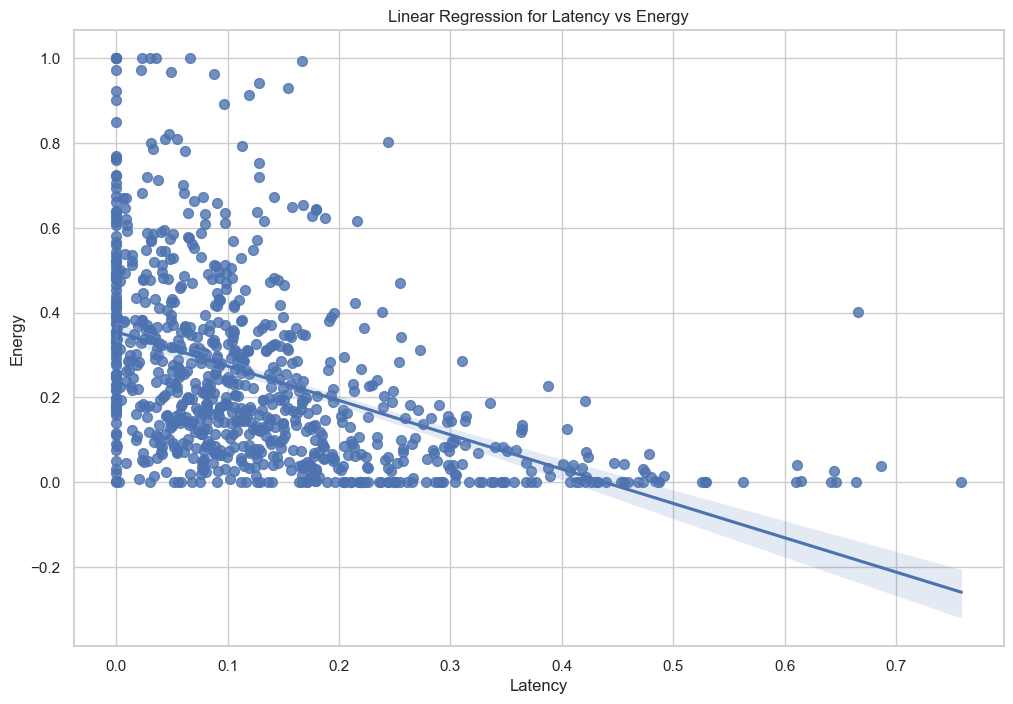

In [263]:
# Creating a scatter plot with a linear regression line for the newest data
plt.figure(figsize=(12, 8))
sns.regplot(x='latency', y='energy', data=gen_200_data, scatter_kws={'s':50})
plt.title('Linear Regression for Latency vs Energy')
plt.xlabel('Latency')
plt.ylabel('Energy')
plt.show()

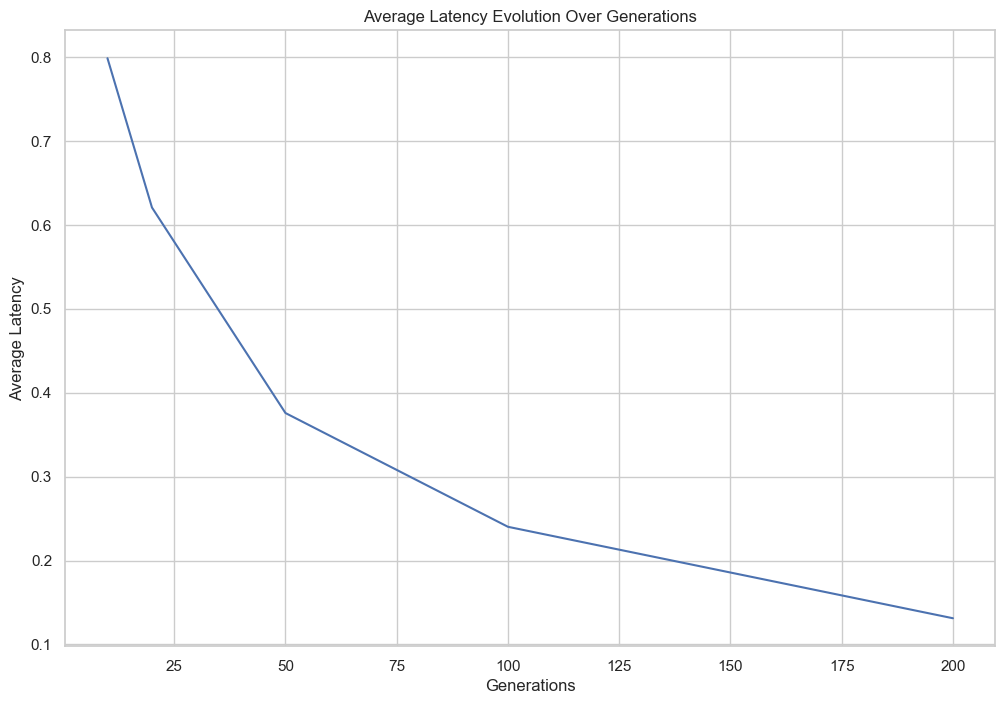

In [264]:
# Calculating the average latency for each generation
avg_latency_per_generation = data.groupby('generations')['latency'].mean().reset_index()

# Creating a line chart to show how latency evolves over generations
plt.figure(figsize=(12, 8))
sns.lineplot(x='generations', y='latency', data=avg_latency_per_generation)
plt.title('Average Latency Evolution Over Generations')
plt.xlabel('Generations')
plt.ylabel('Average Latency')
plt.show()

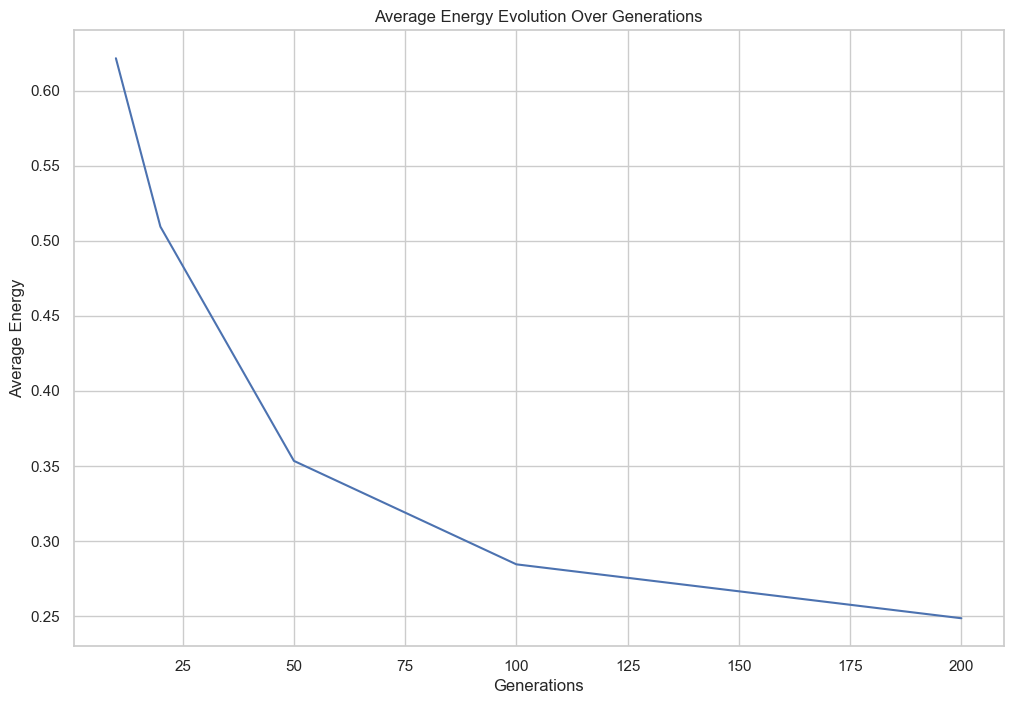

In [265]:
# Calculating the average energy for each generation
avg_energy_per_generation = data.groupby('generations')['energy'].mean().reset_index()

# Creating a line chart to show how energy evolves over generations
plt.figure(figsize=(12, 8))
sns.lineplot(x='generations', y='energy', data=avg_energy_per_generation)
plt.title('Average Energy Evolution Over Generations')
plt.xlabel('Generations')
plt.ylabel('Average Energy')
plt.show()

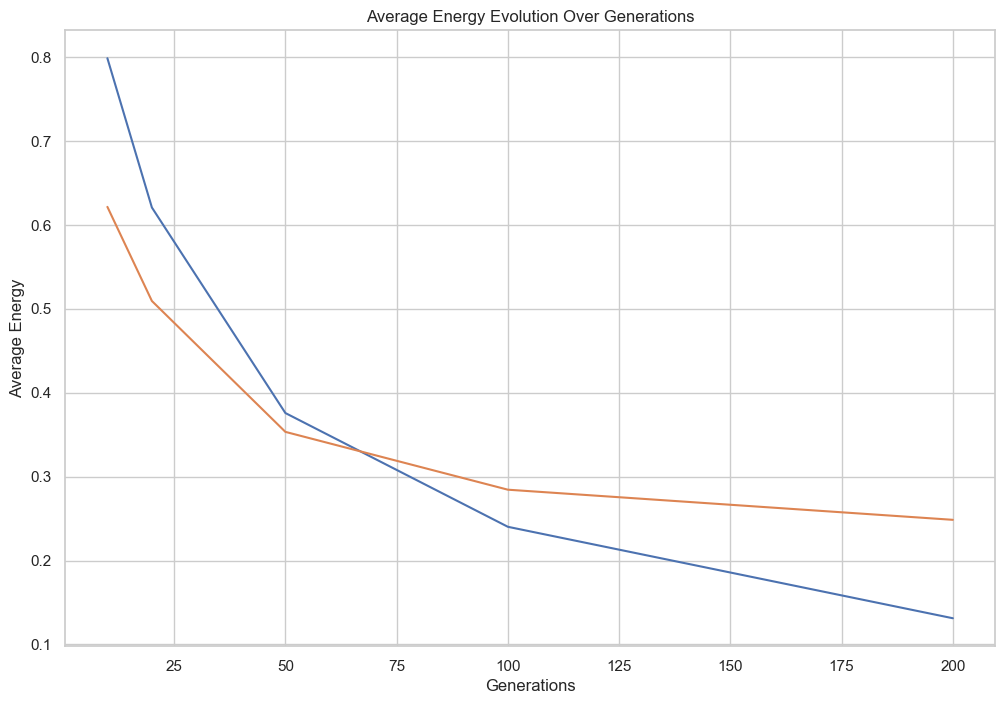

In [266]:
# Creating a line chart to show how energy evolves over generations
plt.figure(figsize=(12, 8))
sns.lineplot(x='generations', y='latency', data=avg_latency_per_generation)
sns.lineplot(x='generations', y='energy', data=avg_energy_per_generation)
plt.title('Average Energy Evolution Over Generations')
plt.xlabel('Generations')
plt.ylabel('Average Energy')
plt.show()

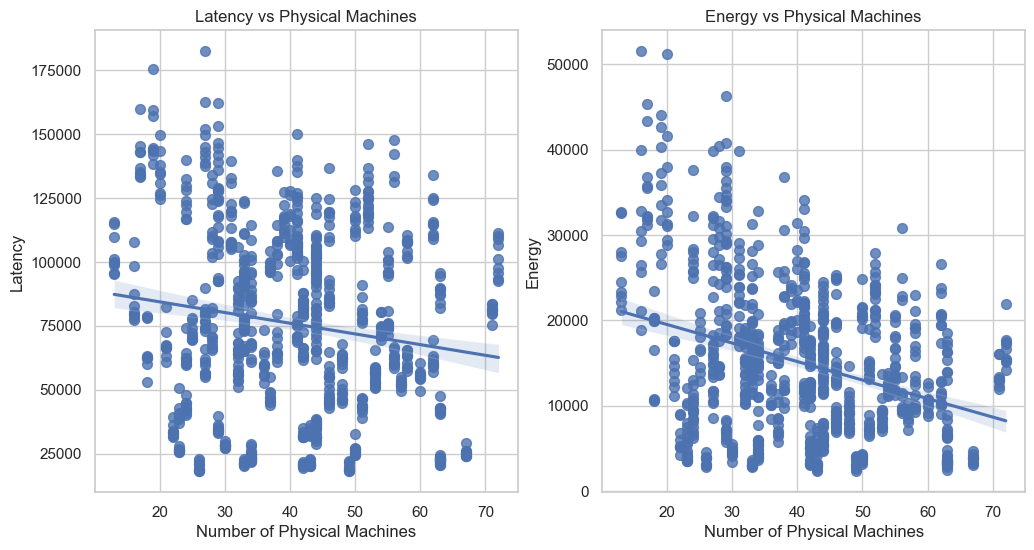

In [282]:
# Latency vs physical_machines
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.regplot(x='physical_machines', y='latency', data=gen_200_raw_data, scatter_kws={'s':50})
plt.title('Latency vs Physical Machines')
plt.xlabel('Number of Physical Machines')
plt.ylabel('Latency')

plt.subplot(1, 2, 2)
sns.regplot(x='physical_machines', y='energy', data=gen_200_raw_data, scatter_kws={'s':50})
plt.title('Energy vs Physical Machines')
plt.xlabel('Number of Physical Machines')
plt.ylabel('Energy')
plt.show()

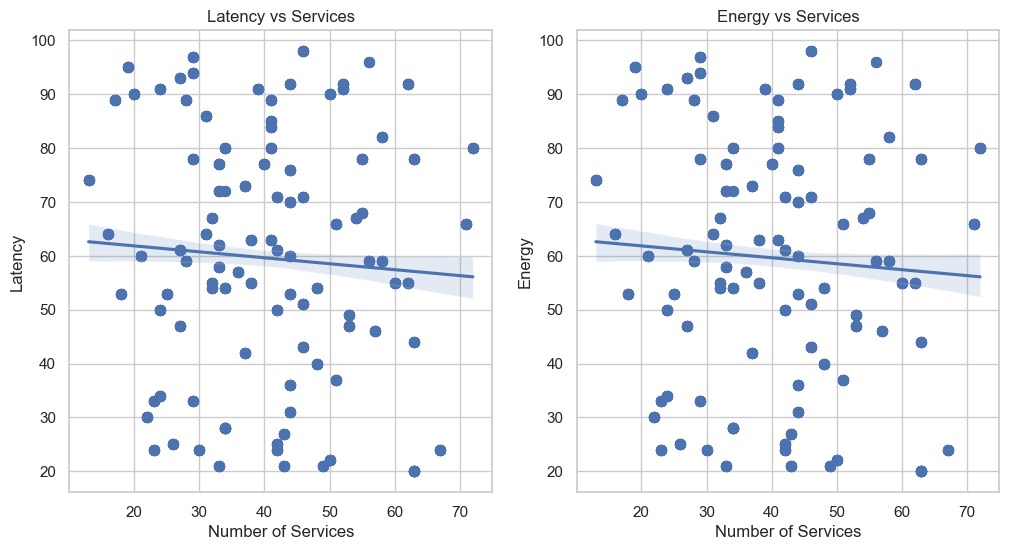

In [281]:
# Latency vs physical_machines
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.regplot(x='physical_machines', y='services', data=gen_200_raw_data, scatter_kws={'s':50})
plt.title('Latency vs Services')
plt.xlabel('Number of Services')
plt.ylabel('Latency')

plt.subplot(1, 2, 2)
sns.regplot(x='physical_machines', y='services', data=gen_200_raw_data, scatter_kws={'s':50})
plt.title('Energy vs Services')
plt.xlabel('Number of Services')
plt.ylabel('Energy')
plt.show()

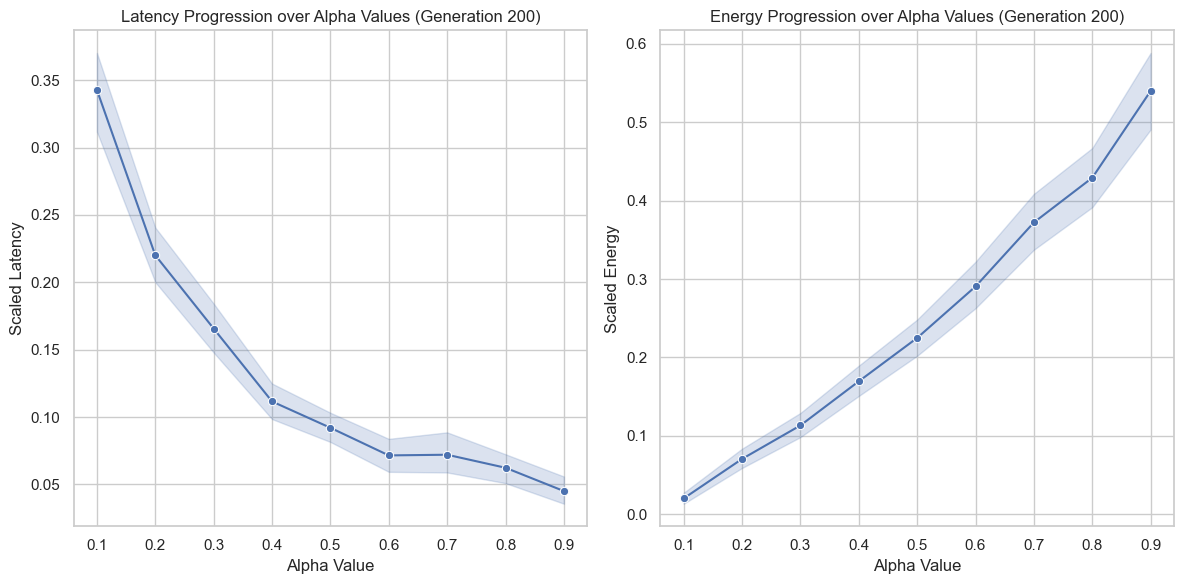

In [278]:
# Line chart for Latency over alpha values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='alpha', y='latency', data=gen_200_data, marker='o')
plt.title('Latency Progression over Alpha Values (Generation 200)')
plt.xlabel('Alpha Value')
plt.ylabel('Scaled Latency')

# Line chart for Energy over alpha values
plt.subplot(1, 2, 2)
sns.lineplot(x='alpha', y='energy', data=gen_200_data, marker='o')
plt.title('Energy Progression over Alpha Values (Generation 200)')
plt.xlabel('Alpha Value')
plt.ylabel('Scaled Energy')
plt.tight_layout()
plt.show()

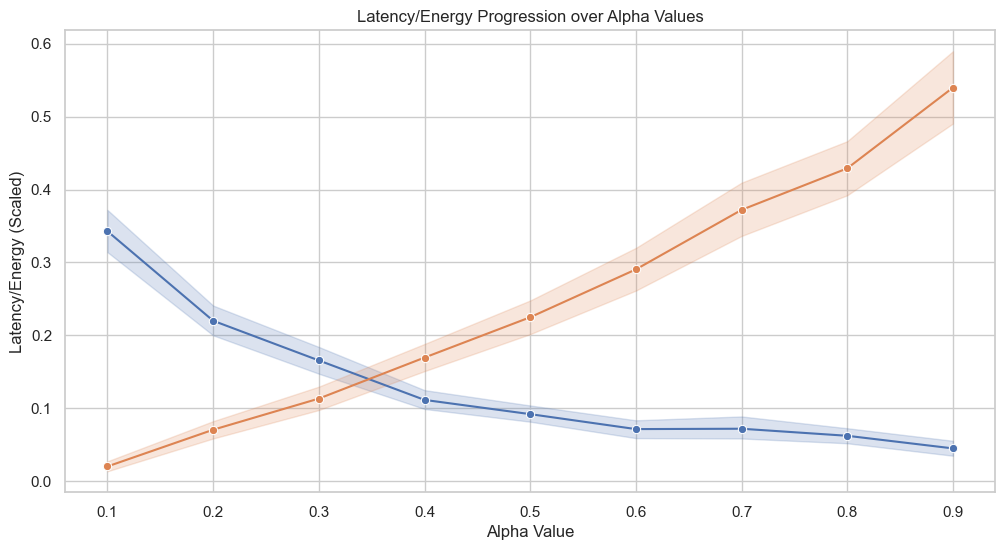

In [280]:
# Line chart for Latency over alpha values
plt.figure(figsize=(12, 6))
sns.lineplot(x='alpha', y='latency', data=gen_200_data, marker='o')
sns.lineplot(x='alpha', y='energy', data=gen_200_data, marker='o')
plt.title('Latency/Energy Progression over Alpha Values')
plt.xlabel('Alpha Value')
plt.ylabel('Latency/Energy (Scaled)')
plt.show()